# Prof D’s Regression Sessions - Vol 1

AKA - Applied Linear Regression - Basics

## Preamble

Over the next 3 weeks we are going **DEEP** into linear regression. The
QM Regression Sessions will be tough, but we will be eased through the
journey in the company of LTJ Bukem, Blame, Conrad and others. Plug into
the Progression Sessions, let them sooth your mind and allow you to get
fully into the Regression Sessions!

## Introduction

This week’s practical is focused on understanding the most basic form of
regression analysis, but in an applied context discovering what these
models help you understand about your data in great detail. You will
essentially re-create some of the analysis you saw in the lecture, but
for slightly different variables and for different places.

Most of what you will be doing in this practical won’t actually be
modelling - although this will come at the end - but you will be getting
to know your data so that your final models make sense. This is how it
should be!! Going back to our bake-off analogy, the modelling is really
just the final bake after hours of preparation.

> **Note**
>
> Below you will find code-blocks that will allow you to run your
> analysis in either R or Python. It’s up to you which you decide to
> use - you might even want to try both to compare (Of course, R will be
> better)!
>
> The Juypter notebook attached to this practical *might* work, but you
> are probably better off just firing up RStudio or VS code, creating a
> new notebook and editing from scratch on your local machine.

## Tasks

> **Warning**
>
> Make sure you complete each of the tasks below, 1-4. All of these will
> be covered in the code examples as you work your way down the page,
> but this is the full
> [workflow](https://dictionary.cambridge.org/dictionary/english/workflow):

### 1. Downloading: Download and read data into your software environment:

-   School locational and attribute information, downloaded from here -
    <https://get-information-schools.service.gov.uk/Downloads> - or read
    it in using the code supplied below. This will include the following
    datasets:

-   **edubase_schools** = this is the ‘all establishment’ data for every
    school in England and Wales

-   School-level Key Stage 4 (14-16 GCSE level) attainment and other
    attribute information. [I have put this on Moodle
    here](https://moodle.ucl.ac.uk/mod/folder/view.php?id=8199904), but
    it can also be downloaded from here -
    <https://www.compare-school-performance.service.gov.uk/download-data>.

    Download to a local drive on your computer from Moodle, unzip it and
    then read it in using the code supplied below. The zip folders
    contain the following data files in one folder and the associated
    metadata in the other folder:

    1.  **england_ks4final** = data on the 2022/23 academic year,
        school-level, KS4 outcomes and associated statistics

    2.  **england_abs** = data on the 2022/23 academic year,
        school-level absence rates

    3.  **england_census** = additional school-level pupil information
        for the 2022/23 academic year

    4.  **england_school_information** = additional school-level
        institution information such as Ofsted rating etc. for the
        2022/23 academic year

    5.  **england_ks4_pupdest** = pupil destination data (where students
        go once they leave school at 16)

### 2. Data Munging: Join, filter, select and subset:

-   Create a master file for England called **england_school_2022_23.**
    This will be made by joining together all of the school-level data
    above into a single file and then reducing it in size using:
    1.  **filter** - so that it just contains open secondary schools
    2.  **select** - so that only a few key variables relating to
        attainment, progress, deprivation, absence and school quality
        remain, alongside key locational and other attributes.
-   Create two local authority data **subsets** from this main file:
    1.  A subset containing all of the secondary schools in one of the
        32 London Boroughs (not including the City of London)
    2.  A subset containing all of the secondary schools in any other
        local authority in England. Any local authority you like - go
        wild!

At the end of this you will have **x3 datasets** - one national and two
local authority subsets

### 3. Exploratory Data Analysis

-   Choose:
    1.  one attainment related dependent variable from your set
    2.  one possible explanatory variable which you think might help
        explain levels of attainment in schools
-   Create a series of graphs and statistical outputs to allow you to
    understand the structure and composition of your data. You should
    produce:
    1.  A histogram for the dependent and independent variables you are
        analysing for **both your two subsets** and the **national
        dataset** (x6 histograms in total). You might want to augment
        your histograms to include:
        1.  mean and median lines
        2.  lines for the upper and lower quartiles
        3.  indications of outliners
        4.  a kernel density smoothing
    2.  Alternative plots such as violin plots or box plots to compare
        with the histogram
    3.  Point Maps of the locations of your schools in your two
        subsets - points sized by either of your variables
    4.  A scatter plot of your dependent (attainment) and independent
        (disadvantage) variables (national and two local subsets) - on
        these plots you might want to include:
        1.  a regression line of best fit
        2.  the R-squared, slope and intercept parameters

### 4. Explanatory Data Analysis - Attainment and Factors Affecting it in Different Parts of England

-   Carry out a bi-variate regression analysis to explore the
    relationship between your chosen attainment dependent variable and
    your single explanatory independent variable, for your two subsets
    and the national dataset. **Questions to Answer**:
    1.  After visualising the relationships using scatter plots, do you
        think you need to transform your variables (e.g. using a log
        transformation) before putting into a regression model? Maybe
        plot scatter plots of your logged variables too!
    2.  What are the slope and intercept coefficients in each model? Are
        they statistically significant and how do vary between your two
        subsets? How do they compare with the national picture?
    3.  How do the R-squared values differ and how reliable do you think
        they are (what do the degrees of freedom tell you)?
    4.  What observations can you make about your two local authority
        study areas relative to the national picture?

## Task 1 - Download your data and read into your software environment

-   I’ve made this task easy for you by giving you the code to download
    all of this data. You’ll need to download a selection of files -
    click on either tab to see the code for each.
-   In order to run this code, you should first [download and unzip the
    data from
    Moodle](https://moodle.ucl.ac.uk/mod/folder/view.php?id=8199904),
    before editing the code below so that you can read the data from a
    local folder on your computer:

> **Note**
>
> I would encourage you **NOT** to just copy and paste this code
> blindly, but try to understand what it is doing at each stage.
>
> You may notice that there are some bits that are redundant (some of
> the NA code that I was messing with before deciding on a single way of
> removing NAs).
>
> What am I doing to the URN field? Why might I be doing that?
>
> What is the regex function doing and why might I be searching out
> those characters? What might happen to the data if I didn’t handle
> those first?

#### 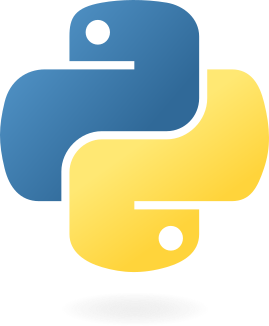

In [ ]:
import pandas as pd
import numpy as np
import janitor
from pathlib import Path

# little function to define the file root on different machines
def find_qm_root(start_path: Path = Path.cwd(), anchor: str = "QM_Fork") -> Path:
    """
    Traverse up from the start_path until the anchor folder (e.g., 'QM')      is found. Returns the path to the anchor folder.
    """
    for parent in [start_path] + list(start_path.parents):
        if parent.name == anchor:
            return parent
    raise FileNotFoundError(f"Anchor folder '{anchor}' not found in path      hierarchy.")
  
qm_root = find_qm_root()


# Read CSV file
edubase_schools = pd.read_csv(
    "https://www.dropbox.com/scl/fi/fhzafgt27v30lmmuo084y/edubasealldata20241003.csv?rlkey=uorw43s44hnw5k9js3z0ksuuq&raw=1",
    encoding="cp1252",
    low_memory=False,
    dtype={"URN": str}
)
edubase_schools = edubase_schools.clean_names()
#py_edubase_schools.dtypes
#dtype_df = py_edubase_schools.dtypes.reset_index()
#dtype_df.columns = ["column_name", "dtype"]

########################################
# Define base path and common NA values - NOTE YOU WILL NEED TO DOWNLOAD THIS DATA AND PUT INTO YOUR OWN base_path LOCATION ON YOUR MACHINE - not this one as this is my path!!!
#base_path = Path("E:/QM/sessions/L6_data/Performancetables_130242/2022-2023")
base_path = qm_root / "sessions" / "L6_data" / "Performancetables_130242" / "2022-2023"
##################################################
na_values_common = ["", "NA", "SUPP", "NP", "NE"]
na_values_extended = na_values_common + ["SP", "SN"]
na_values_attainment = na_values_extended + ["LOWCOV", "NEW"]
na_values_mats = na_values_common + ["SUPPMAT"]
na_all = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "LOWCOV", "NEW", "SUPPMAT", "NaN"]

# Absence data
england_abs = pd.read_csv(base_path / "england_abs.csv", na_values=na_all, dtype={"URN": str})

# Census data
england_census = pd.read_csv(base_path / "england_census.csv", na_values=na_all, dtype={"URN": str})
england_census.iloc[:, 4:23] = england_census.iloc[:, 4:23].apply(lambda col: pd.to_numeric(col.astype(str).str.replace('%', '', regex=False), errors="coerce"))

# KS4 MATs performance data
england_ks4_mats_performance = pd.read_csv(base_path / "england_ks4-mats-performance.csv", na_values=na_all, encoding="cp1252", low_memory=False, dtype={"URN": str})
england_ks4_mats_performance["TRUST_UID"] = england_ks4_mats_performance["TRUST_UID"].astype(str)
england_ks4_mats_performance["P8_BANDING"] = england_ks4_mats_performance["P8_BANDING"].astype(str)
england_ks4_mats_performance["INSTITUTIONS_INMAT"] = england_ks4_mats_performance["INSTITUTIONS_INMAT"].astype(str)

cols_to_convert = england_ks4_mats_performance.columns[10:]
exclude = ["P8_BANDING", "INSTITUTIONS_INMAT"]
cols_to_convert = [col for col in cols_to_convert if col not in exclude]
england_ks4_mats_performance[cols_to_convert] = england_ks4_mats_performance[cols_to_convert].apply(lambda col: pd.to_numeric(col.astype(str).str.replace('%', '', regex=False), errors="coerce"))

# KS4 pupil destination data
england_ks4_pupdest = pd.read_csv(base_path / "england_ks4-pupdest.csv", na_values=na_all, dtype={"URN": str})
england_ks4_pupdest.iloc[:, 7:82] = england_ks4_pupdest.iloc[:, 7:82].apply(lambda col: pd.to_numeric(col.astype(str).str.replace('%', '', regex=False), errors="coerce"))

# KS4 final attainment data
england_ks4final = pd.read_csv(base_path / "england_ks4final.csv", na_values=na_all, dtype={"URN": str})
start_col = "TOTPUPS"
end_col = "PTOTENT_E_COVID_IMPACTED_PTQ_EE"
cols_range = england_ks4final.loc[:, start_col:end_col].columns
# Strip % signs and convert to numeric
england_ks4final[cols_range] = england_ks4final[cols_range].apply(
    lambda col: pd.to_numeric(col.astype(str).str.replace('%', '', regex=False), errors="coerce")
)

# School information data
england_school_information = pd.read_csv(
    base_path / "england_school_information.csv",
    na_values=na_all,
    dtype={"URN": str},
    parse_dates=["OFSTEDLASTINSP"],
    dayfirst=True  # Adjust if needed
)

## Task 2 - Data Munging

-   Use Python or R to join all of the datasets you loaded in the
    previous step into a single master file that we will called
    `england_school_2022_23` using the unique school reference number
    (URN) as the key.
-   Create the master file:

#### 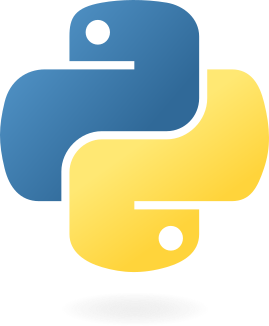

In [ ]:
# Left join england_ks4final with england_abs, census, and school information
england_school_2022_23 = (
    england_ks4final
    .merge(england_abs, on="URN", how="left")
    .merge(england_census, on="URN", how="left")
    .merge(england_school_information, on="URN", how="left")
    .merge(edubase_schools, left_on="URN", right_on="urn", how="left")
)

#### Iterative Checking and initial exploratory analysis

-   It’s never too soon to start exploring your data - even (or indeed
    especially) in the data ‘munging’ (processing, cleaning etc.) stage.
-   You will probably find yourself iteratively plotting, filtering,
    plotting again, switching variables, plotting again, over and over
    again until you are happy with the data you have. This is all part
    of the Exploratory Data Analysis Process and vital before applying
    any other methods to your data!
-   If you recall from the lecture, the histogram of attainment 8 in the
    whole of England dataset looked a bit odd:

### 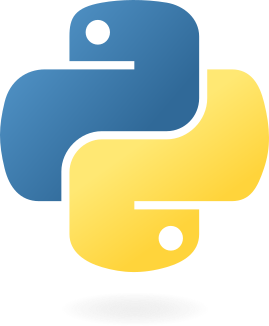

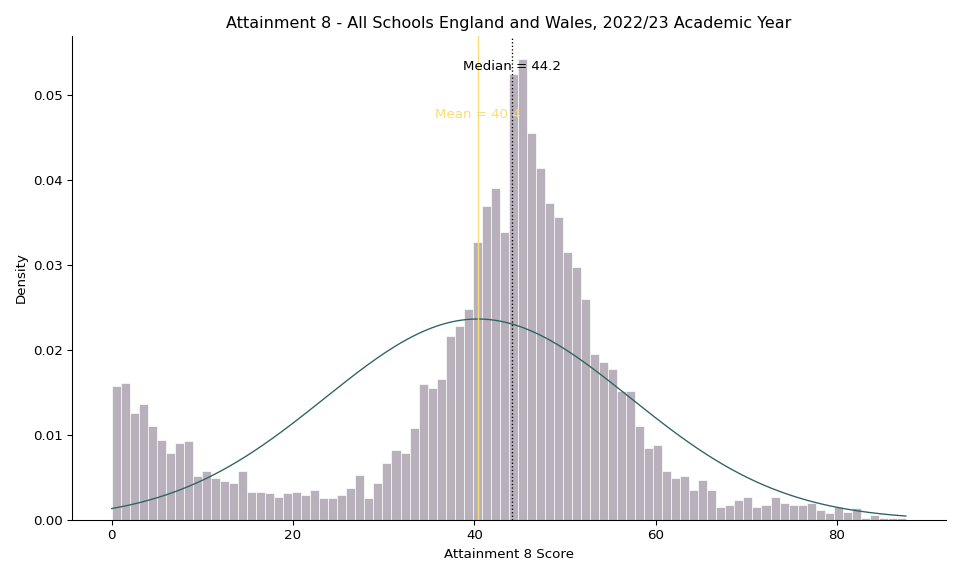

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute statistics
median_value = england_school_2022_23["ATT8SCR"].median(skipna=True)
mean_value = england_school_2022_23["ATT8SCR"].mean(skipna=True)
sd_value = england_school_2022_23["ATT8SCR"].std(skipna=True)

# Set up the figure
plt.figure(figsize=(10, 6))

# Histogram with density
sns.histplot(
    data=england_school_2022_23,
    x="ATT8SCR",
    stat="density",
    binwidth=1,
    color="#4E3C56",
    alpha=0.4,
    linewidth=0.5,
    edgecolor="white"
)

# Overlay normal distribution curve
x_vals = np.linspace(
    england_school_2022_23["ATT8SCR"].min(),
    england_school_2022_23["ATT8SCR"].max(),
    500
)
normal_density = (
    1 / (sd_value * np.sqrt(2 * np.pi))
) * np.exp(-0.5 * ((x_vals - mean_value) / sd_value) ** 2)
plt.plot(x_vals, normal_density, color="#2E6260", linewidth=1)

# Add vertical lines for median and mean
plt.axvline(median_value, color="black", linestyle="dotted", linewidth=1)
plt.axvline(mean_value, color="#F9DD73", linestyle="solid", linewidth=1)

# Annotate median and mean
plt.text(median_value, plt.gca().get_ylim()[1]*0.95, f"Median = {median_value:.1f}",
         color="black", ha="center", va="top", fontsize=10)
plt.text(mean_value, plt.gca().get_ylim()[1]*0.85, f"Mean = {mean_value:.1f}",
         color="#F9DD73", ha="center", va="top", fontsize=10)

# Customize labels and theme
plt.title("Attainment 8 - All Schools England and Wales, 2022/23 Academic Year")
plt.xlabel("Attainment 8 Score")
plt.ylabel("Density")
sns.despine()
plt.tight_layout()

# Show the plot
# plt.show()

-   You may also recall from the lecture that this odd distribution was
    related to different types of school in the system. We can create a
    similar visualisation here:

### 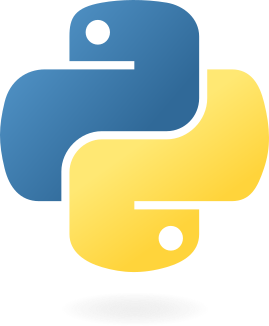

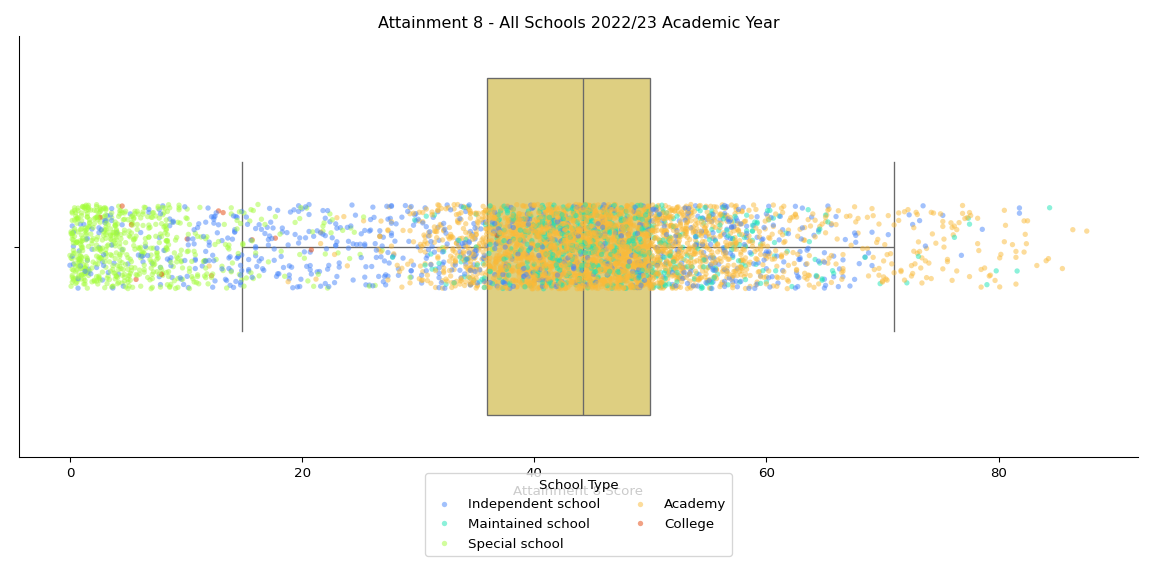

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Boxplot grouped by MINORGROUP
sns.boxplot(
    x='ATT8SCR',
    data=england_school_2022_23,
    color="#EDD971",
    fliersize=0,
    linewidth=1
)

# Jittered points
sns.stripplot(
    x='ATT8SCR',
    data=england_school_2022_23,
    hue='MINORGROUP',
    dodge=False,
    jitter=True,
    alpha=0.5,
    size=4,
    palette='turbo'
)

# Customize the plot
plt.title("Attainment 8 - All Schools 2022/23 Academic Year")
plt.xlabel("Attainment 8 Score")
plt.ylabel("")
plt.legend(title="School Type", loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

#### Further filtering and subsetting

-   Having joined all of these data frames into a single master
    dataframe for the whole of England and observed some issues, we will
    need to filter out some of the rows we don’t want and the columns
    that we don’t need
-   In the two folders you downloaded from Moodle, one contains all of
    the data we need, the other contains all of the metadata which tells
    us what the variables are
-   If you open up, for example `ks4_meta.xlsx` these are the variables
    related to attainment for each school.
-   Similarly `abbreviations.xlsx` attaches some meaning to some of the
    codes associated with some of these variables, with other metadata
    files containing other info. Take some time to look at these so you
    understand the range of variables we’ll be exploring.

> **Note**
>
> One of the key filtering asks carried out in the code below is to
> filter the schools so that we only retain the maintained schools and
> the academies in the dataset

## Task 2 (continued) - Filtering, Selecting and Subsetting

The Code Below already has the syntax to allow you to filter your
dataset and drop special schools, independent schools and colleges.

It also contains the start of some code to allow you to select a smaller
set of variables from the 700-odd in the main file.

1.  Adapt this Python or R code so that it contains these variables plus
    the additional variables listed below (see the note about how you
    may need to adjust the names depending on whether using Python or
    R). - You should end up with 34 in total
2.  Once you have created this filtered and reduced file called
    `england_filtered` use this code below as the template for creating
    two new data subsets:
    1.  london_borough_sub
    2.  england_lad_sub These two new files should create a subset which
        has filtered on the name or code of a London borough and another
        local authority in England

> **Note**
>
> If you are unsure of the names of the local authorities in England,
> use the `la_and_region_codes_meta.csv` file in your metadata folder to
> help you. You might want to name your “sub” files according to the
> names of the local authorities you choose.

#### 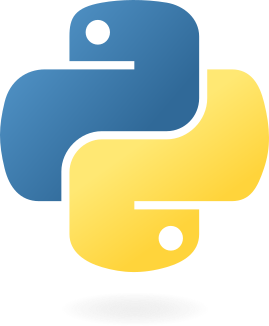

In [ ]:
import pandas as pd

## check all of your variable names first as R and python will call them something different
column_df = pd.DataFrame({'Column Names': england_school_2022_23.columns.tolist()})

# Define excluded MINORGROUP values
excluded_groups = ["Special school", "Independent school", "College", None]

# Filter and select columns
england_filtered = (
    england_school_2022_23[
        ~england_school_2022_23["MINORGROUP"].isin(excluded_groups) &
        (england_school_2022_23["phaseofeducation_name_"] == "Secondary") &
        (england_school_2022_23["establishmentstatus_name_"] == "Open")
    ][["URN", "SCHNAME_x", "LEA", "TOWN_x", "TOTPUPS", "ATT8SCR", "OFSTEDRATING", "MINORGROUP", "PTFSM6CLA1A"]]
)

> **Other variables to include in your reduced dataset**
>
> Other variables to include in your reduced dataset:
>
> 1.  Local Authority (LEA) Code and Name - **LEA** and **LANAME**
> 2.  Total Number of Pupils on Roll (all ages) - **TOTPUPS**
> 3.  Average Attainment 8 score per pupil for English element -
>     **ATT8SCRENG**
> 4.  Average Attainment 8 score per pupil for mathematics element -
>     **ATT8SCRMAT**
> 5.  Average Attainment 8 score per disadvantaged pupil -
>     **ATT8SCR_FSM6CLA1A**
> 6.  Average Attainment 8 score per non-disadvantaged pupil -
>     **ATT8SCR_NFSM6CLA1A**
> 7.  Average Attainment 8 score per boy - **ATT8SCR_BOYS**
> 8.  Average Attainment 8 score per girl - **ATT8SCR_GIRLS**
> 9.  Progress 8 measure after adjustment for extreme scores - **P8MEA**
> 10. Adjusted Progress 8 measure - disadvantaged pupils -
>     **P8MEA_FSM6CLA1A**
> 11. Adjusted Progress 8 measure - non-disadvantaged pupils -
>     **P8MEA_NFSM6CLA1A**
> 12. % of pupils at the end of key stage 4 who are disadvantaged -
>     **PTFSM6CLA1A**
> 13. % of pupils at the end of key stage 4 who are not disadvantaged -
>     **PTNOTFSM6CLA1A**
> 14. % pupils where English not first language - **PNUMEAL**
> 15. % pupils with English first language - **PNUMENGFL**
> 16. % of pupils at the end of key stage 4 with low prior attainment at
>     the end of key stage 2 - **PTPRIORLO**
> 17. % of pupils at the end of key stage 4 with high prior attainment
>     at the end of key stage 2 - **PTPRIORHI**
> 18. Total boys on roll (including part-time pupils) - **NORB**
> 19. Total girls on roll (including part-time pupils) - **NORG**
> 20. Percentage of pupils eligible for FSM at any time during the past
>     6 years - **PNUMFSMEVER**
> 21. Percentage of overall absence - **PERCTOT**
> 22. Percentage of enrolments who are persistent absentees -
>     **PPERSABS10**
> 23. School Type e.g. Voluntary Aided school - **SCHOOLTYPE**
> 24. Religious character - **RELCHAR**
> 25. Admissions Policy - **ADMPOL**
> 26. Government Office Region Name - **gor_name**
> 27. Mixed of Single Sex - **gender_name**

> **Note**
>
> When you joined your datasets earlier, you will find that some
> variables appear in more than one of the datasets. This may cause a
> problem now as R and Python will try and distinguish them in the join
> by appending a `.x` or `.y` (R) or `_x` or `_y` (Python) so you may
> get an error when joining, particularly with the **SCHOOLTYPE** and
> **ADMPOL** variables. For these try **SCHOOLTYPE.x** and **ADMPOL.y**
> (underscore for Python) instead.

## Task 3 - Further Exploratory Analysis and Visual Modelling

-   Using the example code below as a guide, select your own $Y$
    variable related to attainment from your smaller filtered dataset.
    You have a range of attainment or progress related variables in
    there
-   Select your own $X$ variable that might help explain attainment,
    this might relate to disadvantage, prior attainment, absence or
    anything else that is a **continuous** variable (DO NOT SELECT A
    CATEGORICAL VARIABLE AT THIS TIME).
-   Once you have selected your two variables, plot them against each
    other on a scatter plot to see if there is an obvious relationship -
    again, use the code below as a guide.

> **AI tip**
>
> AI - yes, that dreaded thing that’s invading everything. Well, it’s
> hear to stay and while it’s here, you might as well use it to help you
> with your coding. Of course, I don’t want you to blindly copy things
> and not understand what’s going on, but if you get stuck with syntax
> and getting plots to look how you want - feed your favourite AI with
> your code and get it to help you out.

#### Exploratory Data Analysis Plots

> **Questions to Answer**
>
> Just from looking at your plots: - How do you expect the intercepts
> (baseline Y) to differ between your London and non-London local
> authority (if at all)? Which is higher and which is lower? - How do
> you think the slope values (influence of X on Y) are different (if at
> all)?

### 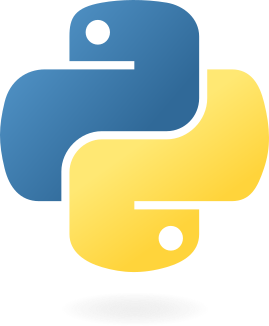

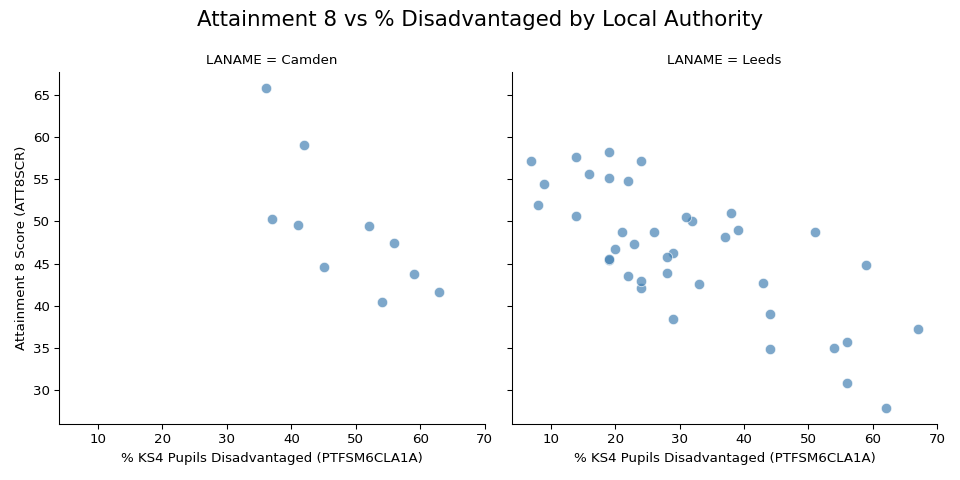

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([camden_sub, leeds_sub])

# Create a function to make and customize the plot
def make_plot():
    g = sns.FacetGrid(combined_data, col="LANAME", height=5, aspect=1)
    g.map_dataframe(
        sns.scatterplot,
        x="PTFSM6CLA1A",
        y="ATT8SCR",
        color="steelblue",
        alpha=0.7,
        s=60
    )
    g.set_axis_labels("% KS4 Pupils Disadvantaged (PTFSM6CLA1A)", "Attainment 8 Score (ATT8SCR)")
    g.fig.suptitle("Attainment 8 vs % Disadvantaged by Local Authority", fontsize=16)
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.85)
    plt.show()

# Call the function once
make_plot()

#### Exploratory Data Analysis Maps

-   Maps are great, they help you understand all kinds of things if your
    data have a spatial identifier. Try some maps out here!
-   You might find R is a bit better at mapping things. Just saying.

### 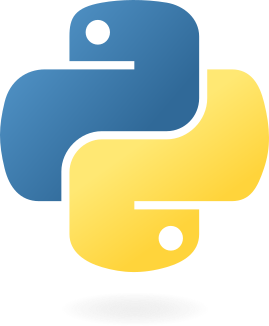

<Axes: >

Text(0.5, 1.0, 'Static Map of Schools Colored by ATT8SCR and Sized by TOTPUPS')

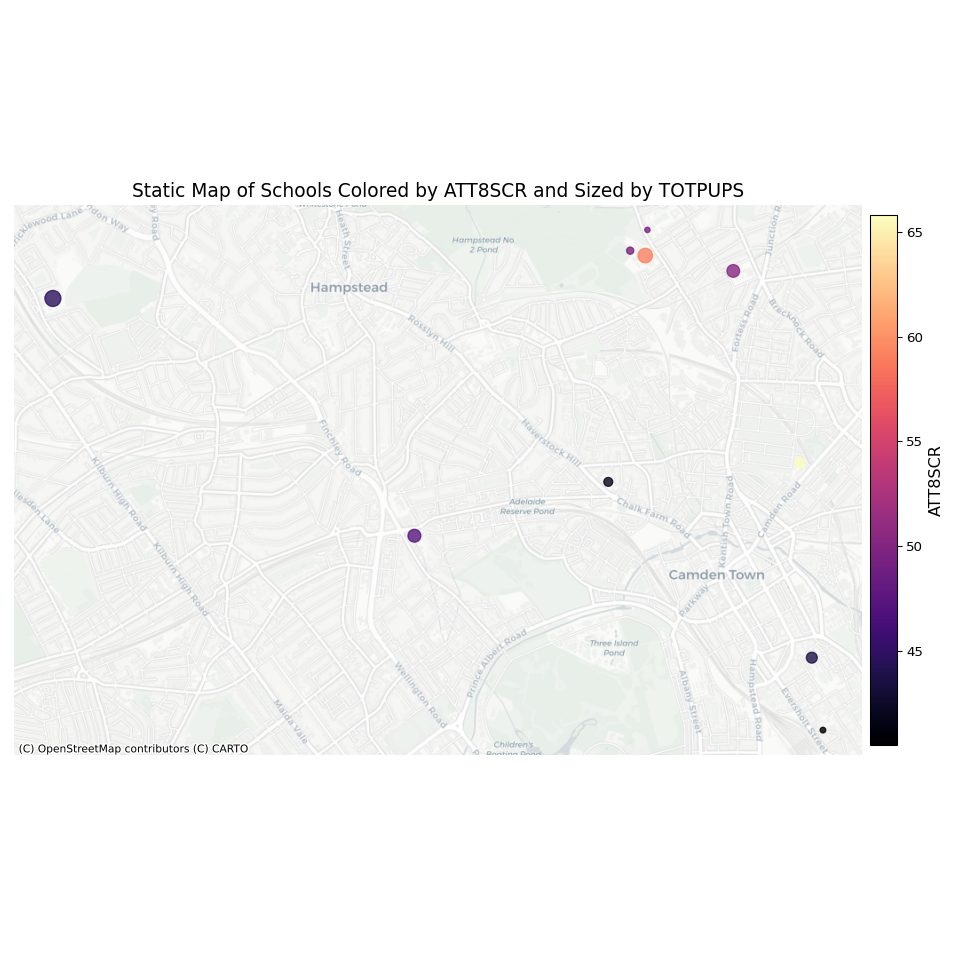

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import contextily as ctx

# Reproject to Web Mercator for contextily
sf_df_mercator = sf_df_bng.to_crs(epsg=3857)

# Scale marker size
min_val = sf_df_mercator['TOTPUPS'].min()
max_val = sf_df_mercator['TOTPUPS'].max()
sf_df_mercator['size_scale'] = 4 + (sf_df_mercator['TOTPUPS'] - min_val) * (12 - 4) / (max_val - min_val)

# Color mapping
norm = Normalize(vmin=sf_df_mercator['ATT8SCR'].min(), vmax=sf_df_mercator['ATT8SCR'].max())
cmap = plt.colormaps['magma']
sf_df_mercator['color'] = sf_df_mercator['ATT8SCR'].apply(lambda x: cmap(norm(x)))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
sf_df_mercator.plot(ax=ax, color=sf_df_mercator['color'], markersize=sf_df_mercator['size_scale']**2, alpha=0.8)

#### Exploratory Data Analysis - Distributions and slicing and dicing

-   You can also explore the scatter plot for your whole of England
    dataset.
-   One really interesting thing to do is to slice and dice your data
    according to some of the categorical variables.
-   In the R visualisation, you can see how we can start to slide and
    dice by regions, for example. Maybe try some of your other
    categorical variables.

> **Note**
>
> You will notice that in the plots below I have used a log10()
> transformation, but you could also use the natural log() or a range of
> other possible transformations. If you want to understand a bit more
> about transformations for normalisng your data, you should explore
> Tukey’s Ladder of Powers -
> <https://onlinestatbook.com/2/transformations/tukey.html> - in R (and
> probably in Python too) there are packages to apply appropriate Tukey
> transformations so your data gets a little closer to a normal
> distribution.

### 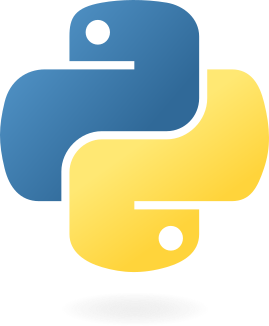

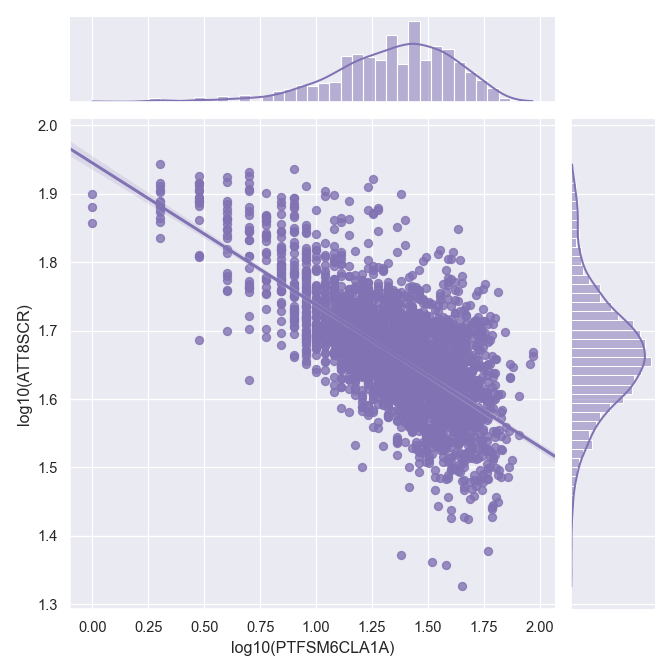

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data into a DataFrame named england_filtered
# england_filtered = pd.read_csv("your_data.csv")

# Apply log10 transformation (replace 0s to avoid log(0))
england_filtered['log_PTFSM6CLA1A'] = np.log10(england_filtered['PTFSM6CLA1A'].replace(0, np.nan))
england_filtered['log_ATT8SCR'] = np.log10(england_filtered['ATT8SCR'].replace(0, np.nan))

# Drop rows with NaNs from log(0)
england_filtered = england_filtered.dropna(subset=['log_PTFSM6CLA1A', 'log_ATT8SCR'])

# Set theme
sns.set_theme(style="darkgrid")

# Create jointplot
g = sns.jointplot(
    x="log_PTFSM6CLA1A",
    y="log_ATT8SCR",
    data=england_filtered,
    kind="reg",
    truncate=False,
    color="m",
    height=7
)

# Label axes
g.set_axis_labels("log10(PTFSM6CLA1A)", "log10(ATT8SCR)")

### 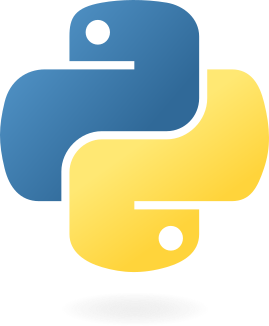

<Axes: xlabel='PTFSM6CLA1A', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PTFSM6CLA1A')

Text(0.5, 0, 'PTFSM6CLA1A')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='ATT8SCR', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of ATT8SCR')

Text(0.5, 0, 'ATT8SCR')

Text(0, 0.5, 'Frequency')

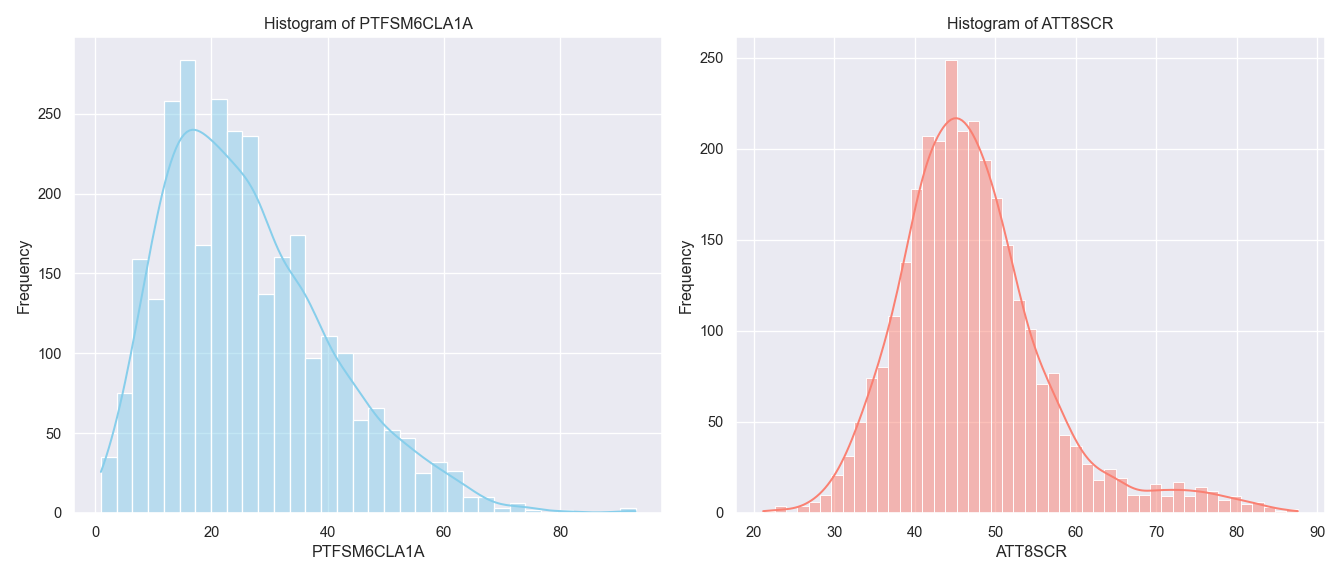

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set_theme(style="darkgrid")

# Create side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for PTFSM6CLA1A
sns.histplot(data=england_filtered, x="PTFSM6CLA1A", ax=axes[0], kde=True, color="skyblue")

> **Explore Different Visualisations**
>
> I’ve just given you a few very basic visualisation types here, but
> there are so many extensions and options available in packages like
> [ggplot2](https://exts.ggplot2.tidyverse.org/gallery/) in R and
> [Seaborn](https://seaborn.pydata.org/examples/index.html) in Python so
> you can get visualising in very creative ways - have a look at some of
> these gallery examples in the links and maybe try experimenting with a
> few different ones! There are no excuses these days for 💩 data
> visualisations!

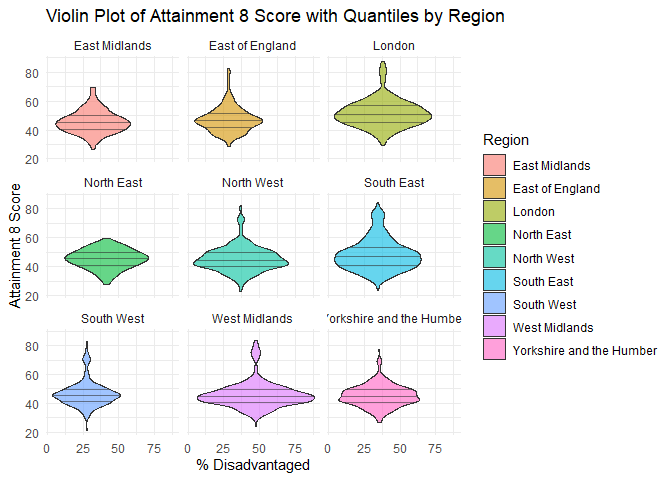

In [ ]:
ggplot(england_filtered, aes(x = PTFSM6CLA1A, y = ATT8SCR, fill = gor_name)) +
  geom_violin(
    position = position_dodge(width = 0.8),
    alpha = 0.6,
    draw_quantiles = c(0.25, 0.5, 0.75)
  ) +
  facet_wrap(~ gor_name) +
  theme_minimal() +
  labs(
    title = "Violin Plot of Attainment 8 Score with Quantiles by Region",
    x = "% Disadvantaged",
    y = "Attainment 8 Score",
    fill = "Region"
  )

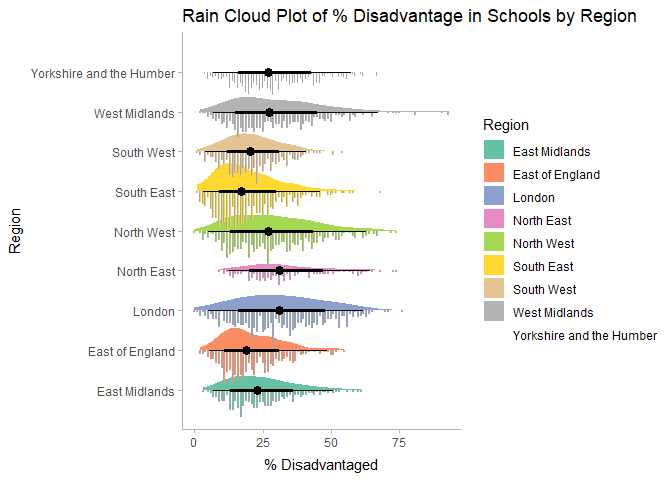

In [ ]:
library(ggdist)

ggplot(england_filtered, aes(x = PTFSM6CLA1A, y = gor_name, fill = gor_name)) + 
  stat_slab(aes(thickness = after_stat(pdf*n)), scale = 0.7) +
  stat_dotsinterval(side = "bottom", scale = 1, slab_linewidth = NA) +
  scale_fill_brewer(palette = "Set2") +
  theme_ggdist() +
  labs(
    title = "Rain Cloud Plot of % Disadvantage in Schools by Region",
    x = "% Disadvantaged",
    y = "Region",
    fill = "Region"
  )

## Task 4 - Explanatory Analysis - Running Your Regression Model

-   Now you have carried out some appropriate exploratory data analysis,
    you should run a simple bi-variate regression model for your two
    local authority areas and compare it with a similar analysis run on
    the national dataset

> **Tip**
>
> -   Depending on your variables and whether or not there appears to be
>     a linear relationship or a log-log or level-log relationship, if
>     you transform a variable for the national data or one of your
>     subsets, you could also transform it for the others, otherwise it
>     will be impossible to compare

-   The Code below is an example using my variables, but you should use
    the variables you have selected.

#### Running the Model for the first (London) local authority

### 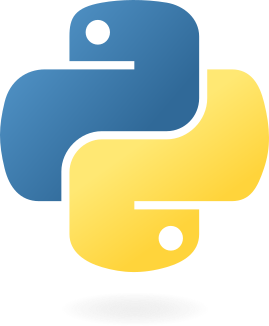

In [ ]:
import numpy as np
import statsmodels.api as sm

# Log-transform the variables
camden_sub['log_ATT8SCR'] = np.log(camden_sub['ATT8SCR'])
camden_sub['log_PTFSM6CLA1A'] = np.log(camden_sub['PTFSM6CLA1A'])

# Define independent and dependent variables
X = sm.add_constant(camden_sub['log_PTFSM6CLA1A'])  # adds intercept
y = camden_sub['log_ATT8SCR']

# Fit the model
camden_model1 = sm.OLS(y, X).fit()
#camden_summary = extract_model_summary(camden_model1, 'Camden Model')

# Print summary
print(camden_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     10.88
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0109
Time:                        13:29:42   Log-Likelihood:                 9.4809
No. Observations:                  10   AIC:                            -14.96
Df Residuals:                       8   BIC:                            -14.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1206      0.678     

#### Running the Model for the second local authority

### 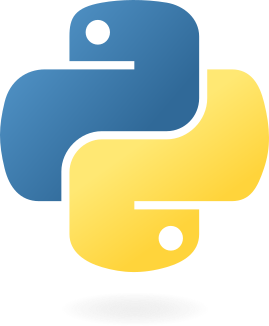

In [ ]:
import numpy as np
import statsmodels.api as sm


# Log-transform safely: replace non-positive values with NaN
leeds_sub['log_ATT8SCR'] = np.where(leeds_sub['ATT8SCR'] > 0, np.log(leeds_sub['ATT8SCR']), np.nan)
leeds_sub['log_PTFSM6CLA1A'] = np.where(leeds_sub['PTFSM6CLA1A'] > 0, np.log(leeds_sub['PTFSM6CLA1A']), np.nan)

# Drop rows with NaNs in either column
leeds_clean = leeds_sub.dropna(subset=['log_ATT8SCR', 'log_PTFSM6CLA1A'])

# Define independent and dependent variables
X = sm.add_constant(leeds_clean['log_PTFSM6CLA1A'])  # adds intercept
y = leeds_clean['log_ATT8SCR']

# Fit the model
leeds_model1 = sm.OLS(y, X).fit()
#leeds_summary = extract_model_summary(leeds_model1, 'Leeds Model')

# Print summary
print(leeds_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     35.71
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           6.77e-07
Time:                        13:29:42   Log-Likelihood:                 26.542
No. Observations:                  39   AIC:                            -49.08
Df Residuals:                      37   BIC:                            -45.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.5473      0.123     

#### Running the Model for all Schools in England

### 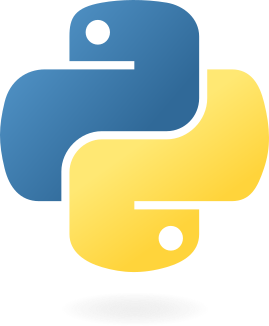

In [ ]:
import numpy as np
import statsmodels.api as sm


# Log-transform safely: replace non-positive values with NaN
england_filtered['log_ATT8SCR'] = np.where(england_filtered['ATT8SCR'] > 0, np.log(england_filtered['ATT8SCR']), np.nan)
england_filtered['log_PTFSM6CLA1A'] = np.where(england_filtered['PTFSM6CLA1A'] > 0, np.log(england_filtered['PTFSM6CLA1A']), np.nan)

# Drop rows with NaNs in either column
england_clean = england_filtered.dropna(subset=['log_ATT8SCR', 'log_PTFSM6CLA1A'])

# Define independent and dependent variables
X = sm.add_constant(england_clean['log_PTFSM6CLA1A'])  # adds intercept
y = england_clean['log_ATT8SCR']

# Fit the model
england_model1 = sm.OLS(y, X).fit()
#england_summary = extract_model_summary(england_model1, 'England Model')

# Print summary
print(england_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            log_ATT8SCR   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     2611.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:29:43   Log-Likelihood:                 1668.0
No. Observations:                2968   AIC:                            -3332.
Df Residuals:                    2966   BIC:                            -3320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4778      0.013    3

#### Combining your outputs for comparison

Don’t forget to run some basic regression modelling checks on all of
your models:

> **Note**
>
> If you are doing this in Python, it appears there isn’t a nice little
> package with the code for diagnostic plots already created. However,
> the statsmodels pages do have some code we can borrow -
> https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html -
> run this first before using the functions below

### Linearity

### 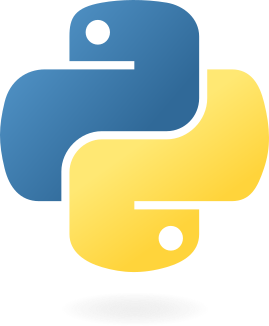

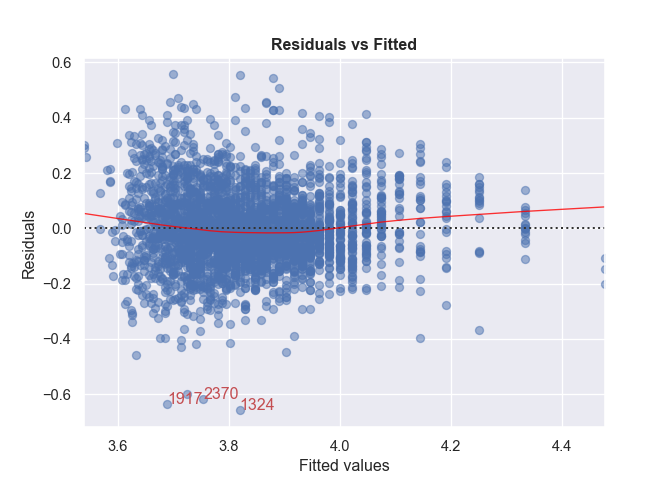

In [ ]:
cls = LinearRegDiagnostic(england_model1)

cls.residual_plot();
plt.show()

### Homoscedasticity (Constant variance)?

### 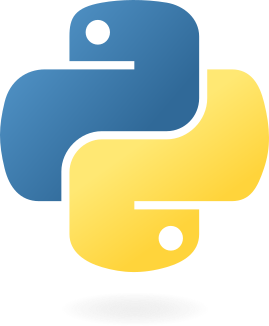

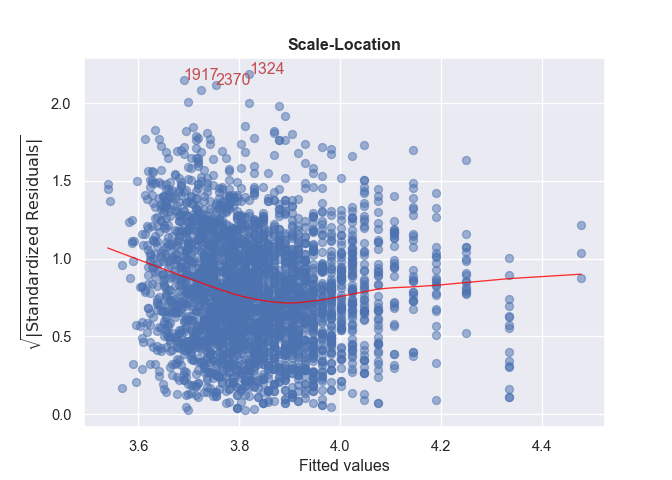

In [ ]:
cls.scale_location_plot();
plt.show()

### Normality of Residuals

### 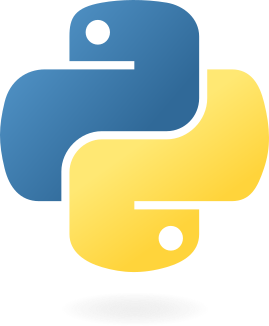

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

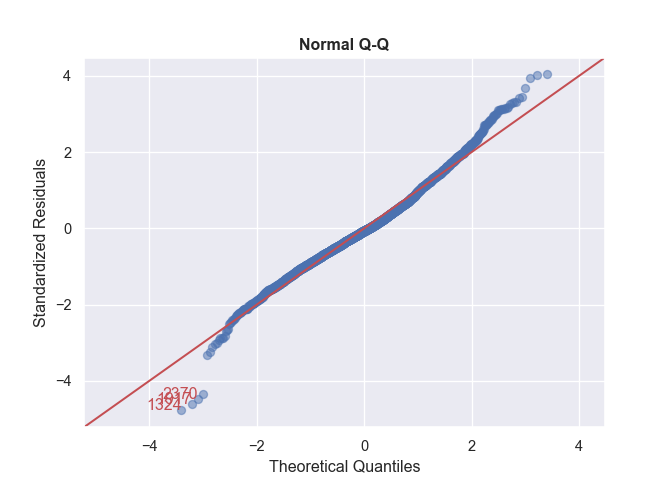

In [ ]:
cls.qq_plot()

### Influence of Outliers

### 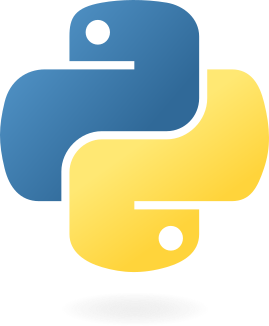

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

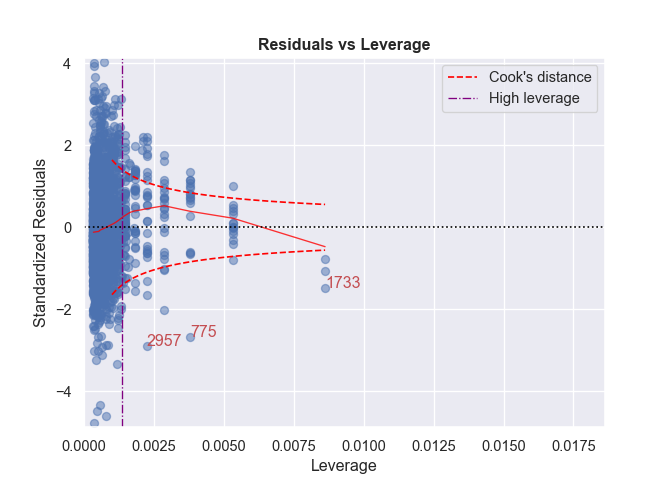

In [ ]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold="dof")

#### Combining your outputs for comparison

> **Note**
>
> You might notice that R is a bit better at things like manipulating
> model outputs than Python!

### 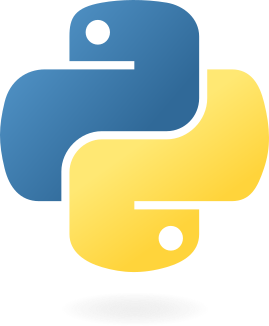

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col 

results_table = summary_col(
    results=[camden_model1, leeds_model1, england_model1],
    model_names=['Camden Model', 'Leeds Model', 'England Model'],
    stars=True,
    float_format="%0.3f",
    # You can customize what model statistics show up here (like R2, N, F-stat)
    info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))}
)

# 
# # Round for readability
print(results_table)


                Camden Model Leeds Model England Model
------------------------------------------------------
const           6.121***     4.547***    4.478***     
                (0.678)      (0.123)     (0.013)      
log_PTFSM6CLA1A -0.578**     -0.220***   -0.207***    
                (0.175)      (0.037)     (0.004)      
R-squared       0.576        0.491       0.468        
R-squared Adj.  0.523        0.477       0.468        
N               10           39          2968         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

> **Questions to Answer**
>
> Comparing your three regression models:
>
> 1\. How do the intercept (baseline) attainment values differ between
> your three models? **remember, if you (natural)logged your variables,
> you will need to take the exponential of the coefficient to interpret
> it back on the original scale.**
>
> 2\. What do the differences in the slope values tell you?
>
> 3\. Are your intercept and slope values statistically significant? If
> so, at what level?
>
> 4\. How do the R-squared values differ between your models?
>
> 5\. What can you say about your degrees of freedom and the reliability
> of your R-squared and other coefficients between your models?
>
> 6\. What is the overall story of the relationship between your
> attainment variable and your explanatory variable considering both
> your local examples and comparison with schools across the rest of
> England?

### What does my model show?

1.  Baseline attainment (intercept) is much higher in Camden than in
    Leeds or the whole of England. Exp(6.12) = 455.32. So the Attainment
    8 Score in Camden would be 455 (an impossible score) when % of
    disadvantaged children in a school are 0. This compares to
    exp(4.547) = 94.35 in Leeds and exp(4.478) = 88.06 in England as a
    whole. All of these intercepts are statistically significant
    (i.e. observed values not a chance relationship). While unrealistic
    (potentially due to the low degrees of freedom), the Camden
    intercept shows us that after controlling for disadvantage, baseline
    attainment in Camden is better than in Leeds or the rest of England.

2.  The slope value of -0.207 for England shows that across the country.
    As this is a log-log model, it is an **Elasticity**: A 1% increase
    in % of disadvantaged students in a school is associated with a
    0.21% decrease in attainment. HOWEVER, as this is a log-log model,
    the effect is far stronger at one end of the distribution than the
    other.

    -   What this means is that a change from 1% to 10% of disadvantaged
        students in a school there is a 37.9% decrease in attainment,
        however, change from 21% to 30% leads to just a 7.1% decrease in
        attainment.

> **AI can help here!**
>
> One of the things that large language models are quite good at is
> interpreting regression coefficients in the context of real data.
>
> They don’t always get it right, so **USE WITH EXTREME CAUTION AND
> ALWAYS DOUBLE CHECK WITH YOUR OWN UNDERSTANDING**, however, they *can*
> help explain what YOUR model coefficients mean in relation to YOUR
> data in an incredibly helpful way. If you get stuck, try feeding an
> LLM (ChatGTP, Gemini etc.) with your regression outputs and a
> description of your data and see what it can tell you

This effect is similar for Leeds, but apparently far more severe in
Camden where the slope is much steeper. However, Camden doesn’t
experience very low levels of disadvantage in its schools (unlike in
Leeds and the rest of the county), with the lowest level around 35%.
With low numbers of schools in the Borough, this observation is
potentially unreliable.

1.  The slopes and intercept coefficients in all models are all
    apparently statistically significant - but as we have seen with
    Camden, this does not necessarily mean our observations are
    generalisable! This is a good lesson in the difference between
    statistical significance (p-values are not a panacea!) and why you
    should always interrogate your model fully when interpreting
    outputs.

2.  Again, R-squared values might fool you into thinking the Camden
    model is ‘better’ than the other models, however, the R-squared is
    partially an artefact of the low degrees of freedom in the model.

3.  See above.

4.  Overall, we can make some crucial observations that encourage
    further research. While the model for England suggests a moderately
    strong log-log relationship between levels of disadvantage in a
    school and attainment, looking at this relationship for a London
    Borough (Camden) - and another Local Authority in England (Leeds)
    it’s the case that this is unlikely to be a universal relationship.

The baseline of attainment in Camden, controlling for disadvantage, is
much higher than in the rest of the country. Students get higher levels
of attainment, even when controlling for disadvantage. The log log
relationship is crucial as it shows that on average, at low levels of
disadvantage small increases have a more severe impact on attainment
level, whereas at higher levels, similar changes have much reduced
effects.

### Your Turn

To finish off the practical, see if you can answer the questions above
for your example.